# Adaptive Shared vs No Shared Memory

This notebook compares differing shared memory carveouts with their no shared memory correspondents.

In [1]:
import os
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier

shared_directory_path = 'SetCapacityData'
no_shared_directory_path = 'NoSharedData'
shared_paths = []
no_shared_paths = []

# List all files in the directory
for filename in os.listdir(shared_directory_path):
  if filename == '.DS_Store':
    continue
  file_path = os.path.join(shared_directory_path, filename)
  if os.path.isfile(file_path):
      shared_paths.append(file_path)

# List all files in the no shared directory
for filename in os.listdir(no_shared_directory_path):
  if filename == '.DS_Store':
    continue
  file_path = os.path.join(no_shared_directory_path, filename)
  if os.path.isfile(file_path):
      no_shared_paths.append(file_path)

# Order the paths so that the arrays have the capacities in the same order for plotting
no_shared_paths = sorted(no_shared_paths)
shared_paths = sorted(shared_paths)
print(shared_paths)
print(no_shared_paths)

/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier
['SetCapacityData/AxavierSetSharedOne12th.csv', 'SetCapacityData/BxavierSetSharedTwo12th.csv', 'SetCapacityData/CxavierSetSharedThree12th.csv', 'SetCapacityData/DxavierSetSharedFour12th.csv', 'SetCapacityData/ExavierSetSharedFive12th.csv', 'SetCapacityData/FxavierSetSharedSix12th.csv', 'SetCapacityData/GxavierSetSharedSeven12th.csv', 'SetCapacityData/HxavierSetSharedEight12th.csv', 'SetCapacityData/IxavierSetSharedNine12th.csv', 'SetCapacityData/JxavierSetSharedTen12th.csv', 'SetCapacityData/KxavierSetSharedEleven12th.csv', 'SetCapacityData/LxavierSetSharedTwelve12th.csv']
['NoSharedData/AxavierNoSharedOne12th.csv', 'NoSharedData/BxavierNoSharedTwo12th.csv', 'NoSharedData/CxavierNoSharedThree12th.csv', 'NoSharedData/DxavierNoSharedFour12th.csv', 'NoSharedData/ExavierNoSharedFive12th.csv', 'NoSharedData/FxavierNoSharedSix12th.csv', 'NoSharedData/GxavierNoSharedSeven12th.csv', 'NoSharedData/HxavierNoSharedEight12th.csv'

### Load in the data

In [2]:
import numpy as np
%cd ~/Desktop/Research/GPU-research/Preemptions
from analyzer_functions import *
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier

# Store all of the intervals in arrays
no_shared_ivls_array, shared_ivls_array = [], []

for noSharedPath, sharedPath in zip(no_shared_paths, shared_paths):
  # load in the data and calculate the preemption and execution intervals
  no_shared_ivls, shared_ivls = data_loader(noSharedPath=noSharedPath, sharedPath=sharedPath, onlyPreemptIvls=True)

  # convert to microseconds
  shared_ivls = np.array(shared_ivls) / 1000
  no_shared_ivls = np.array(no_shared_ivls) / 1000

  # append to the interval arrays
  shared_ivls_array.append(shared_ivls)
  no_shared_ivls_array.append(no_shared_ivls)

/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions
/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier


## Plot the median lines

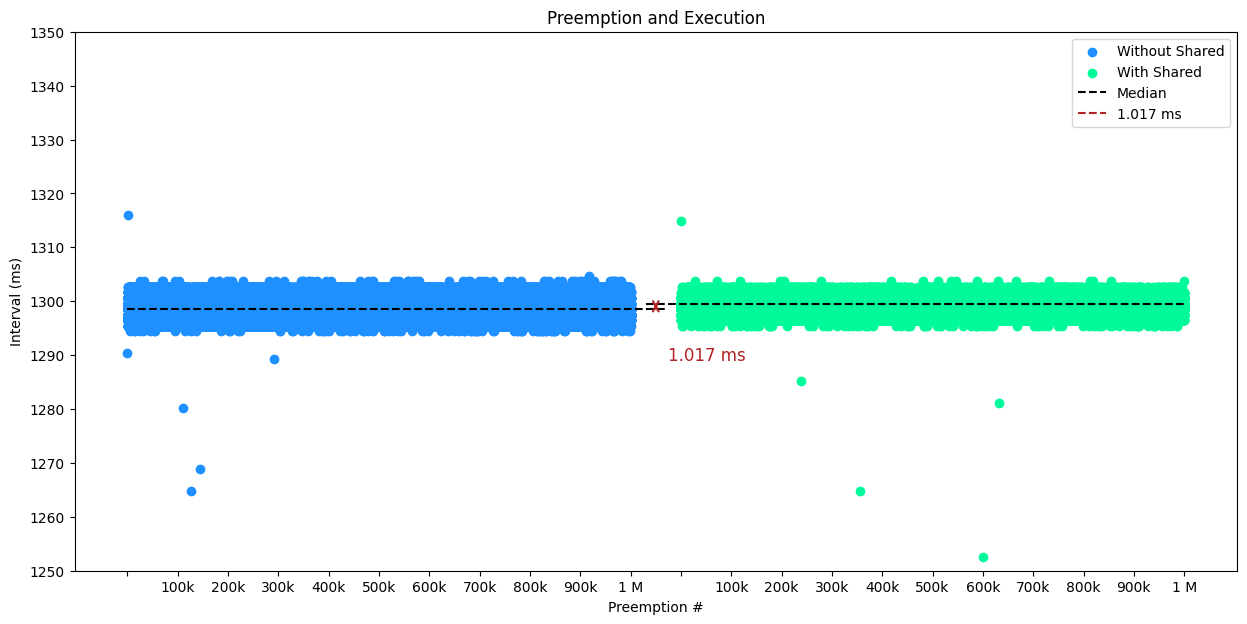

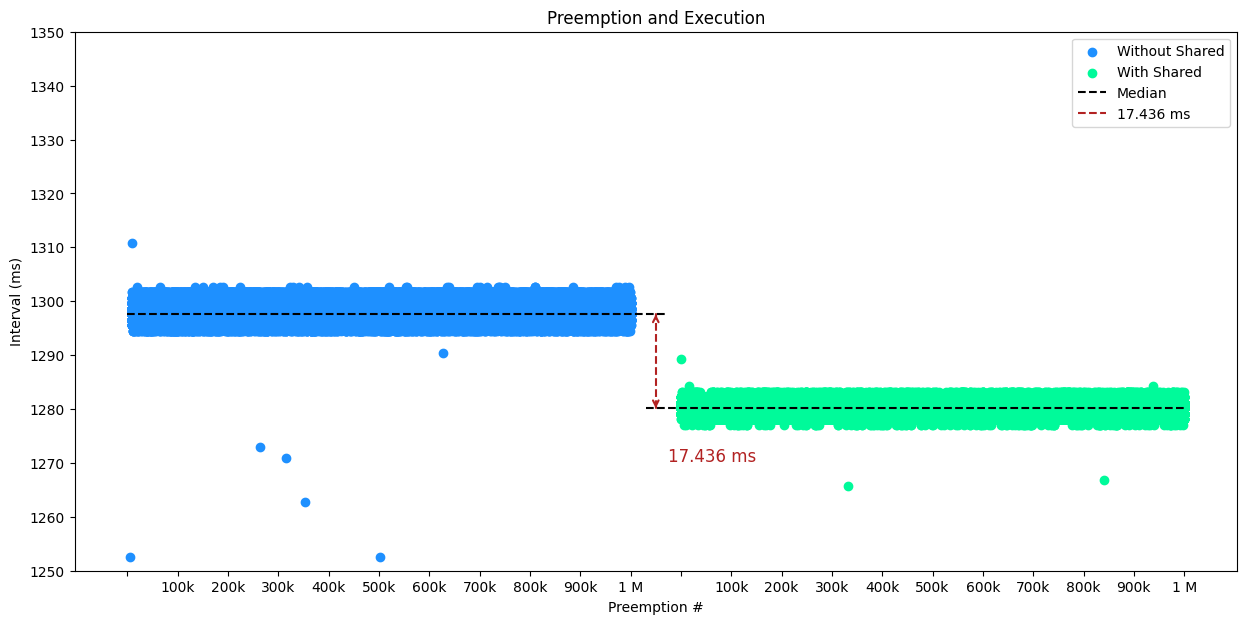

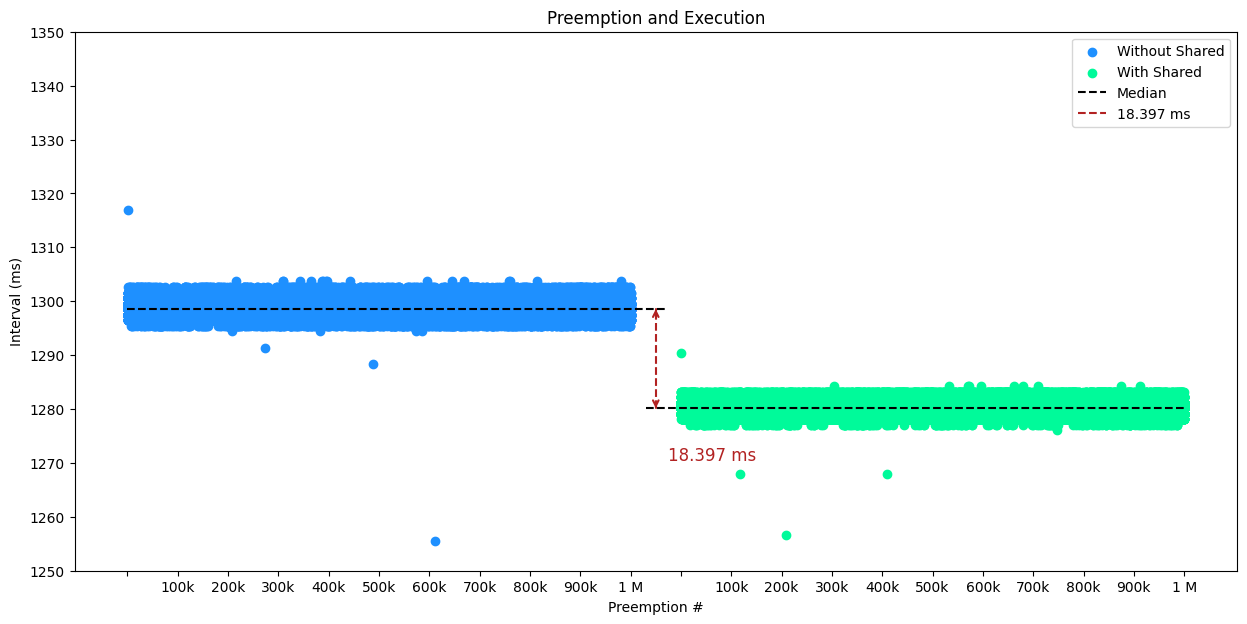

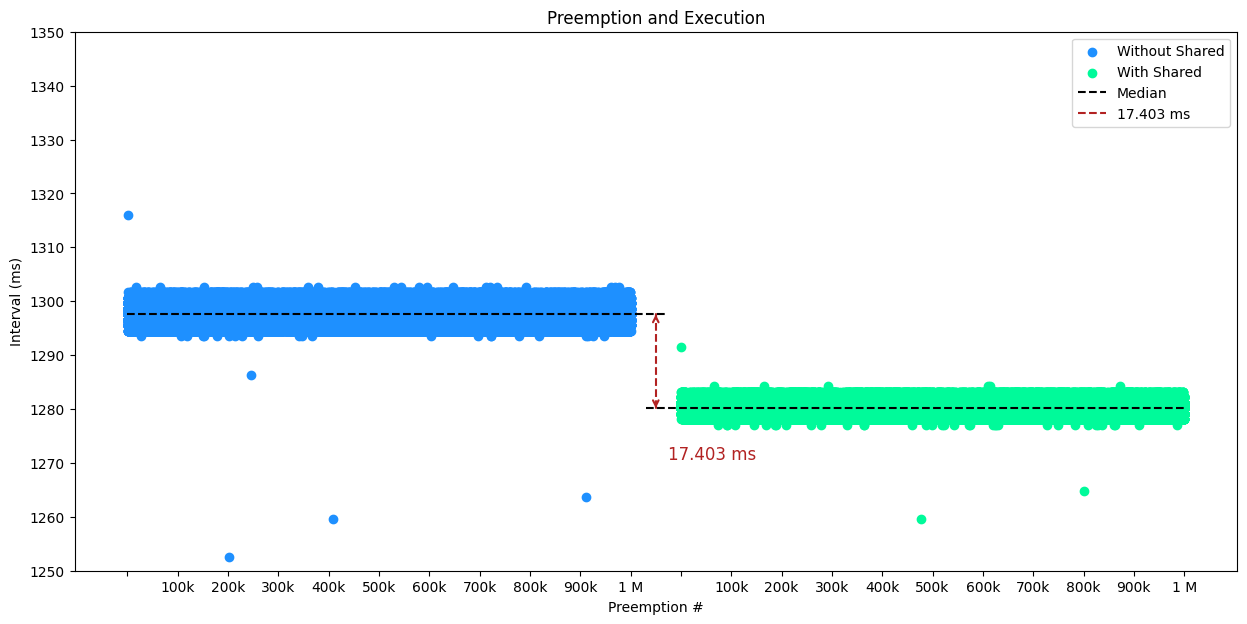

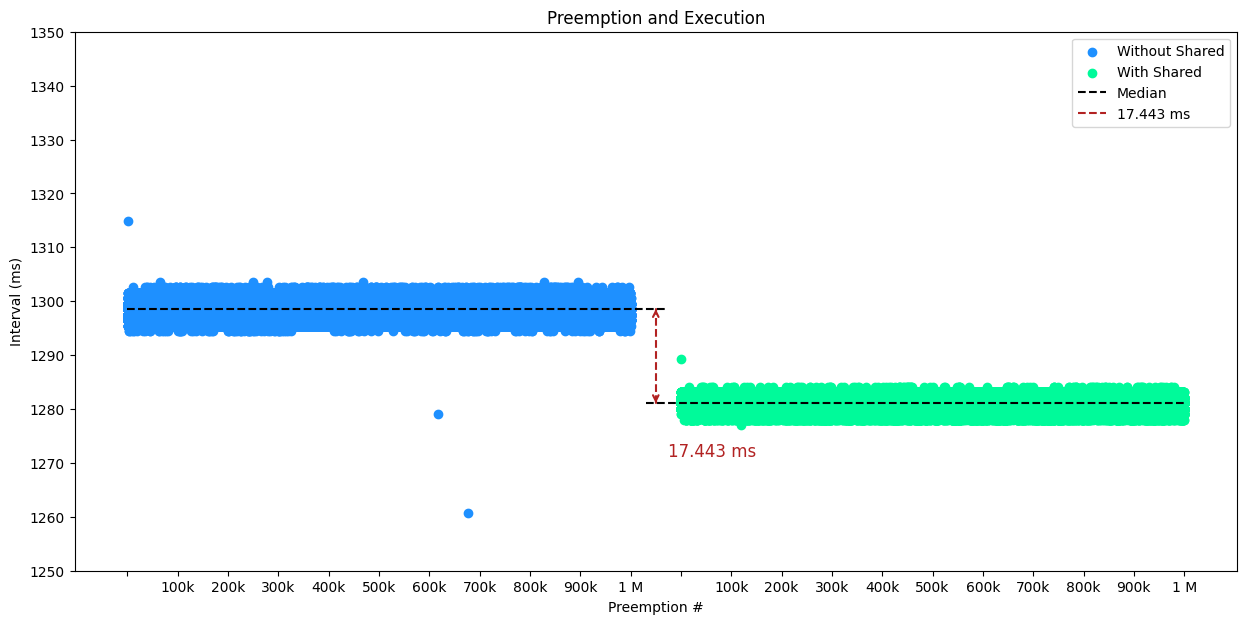

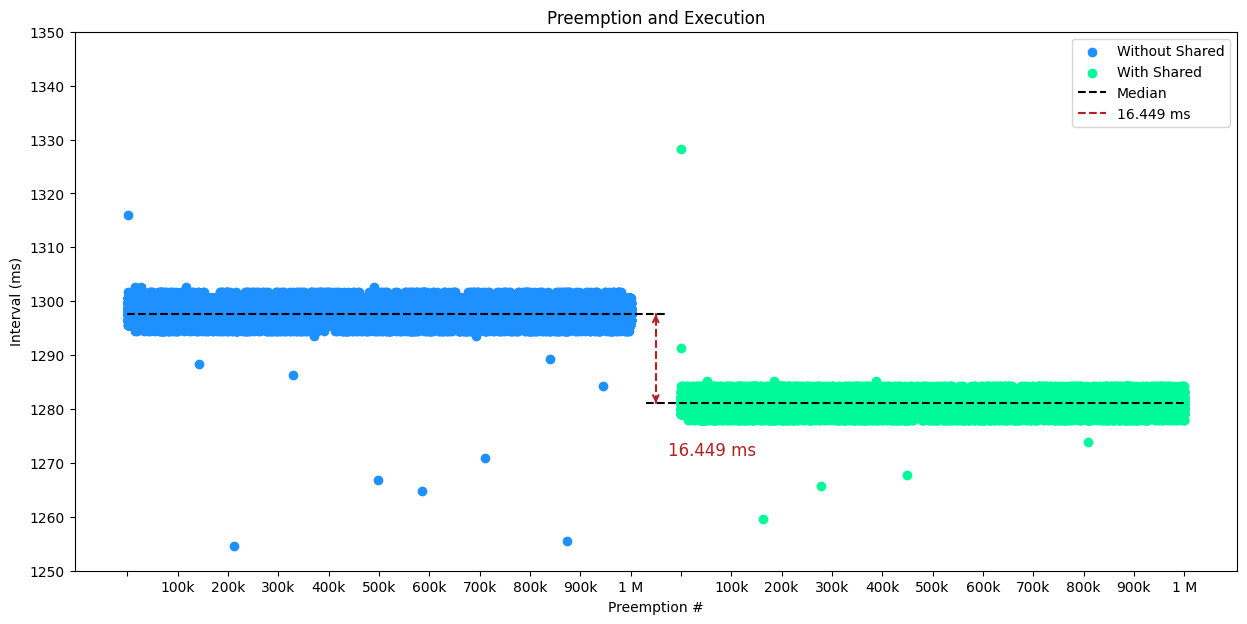

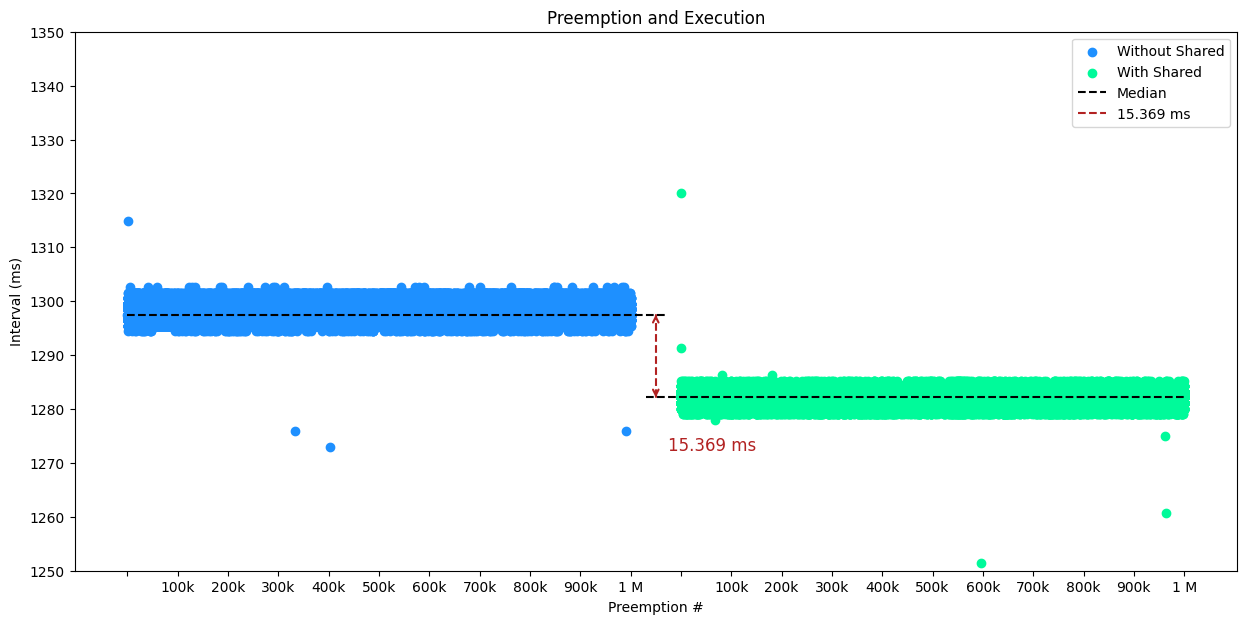

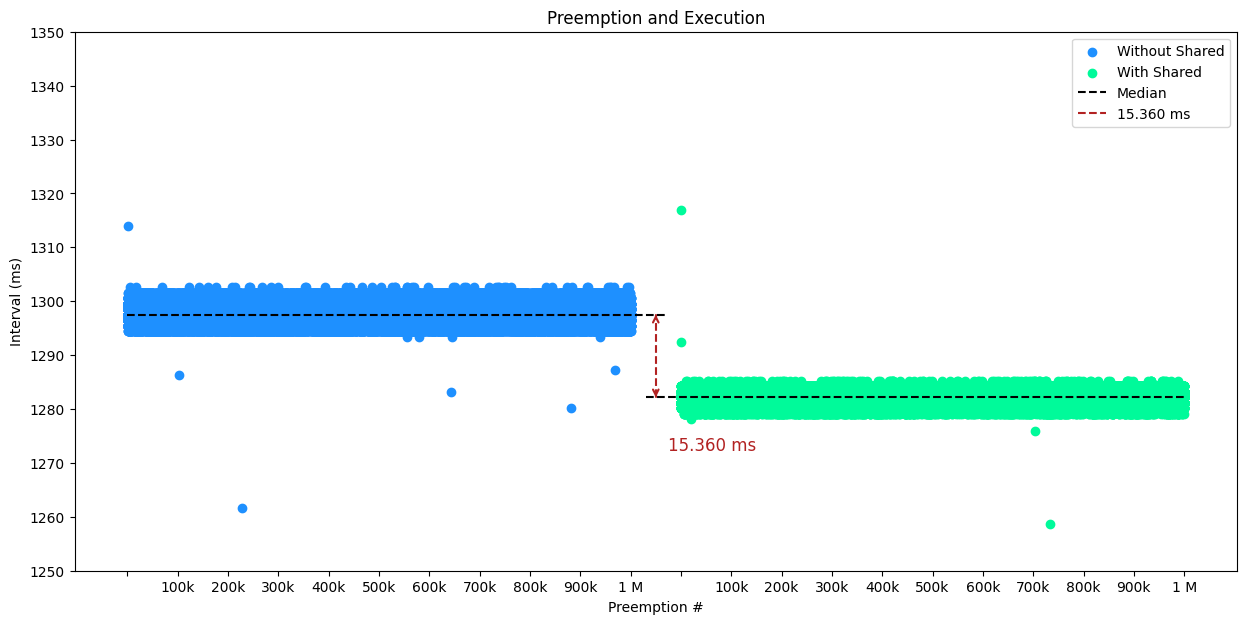

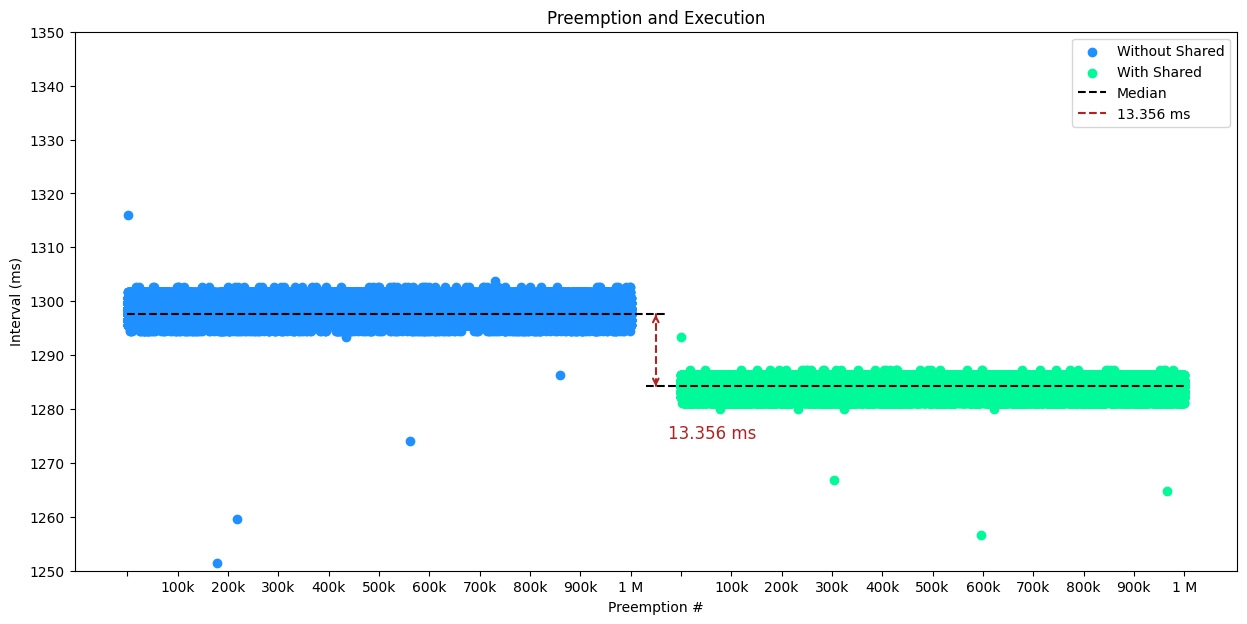

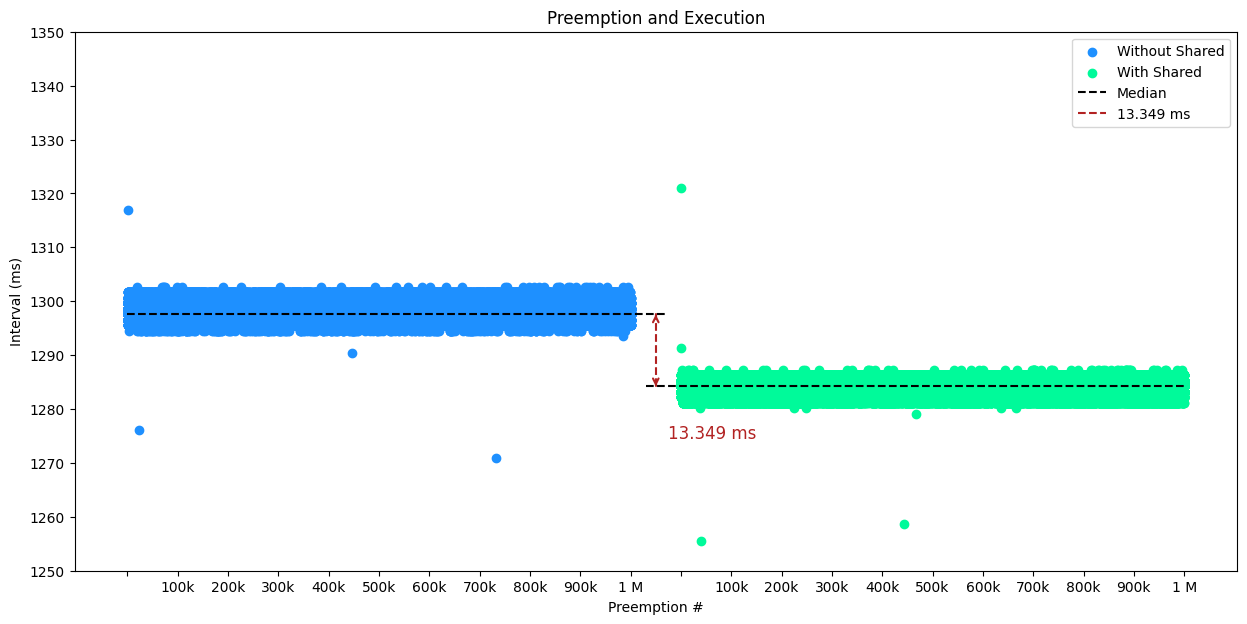

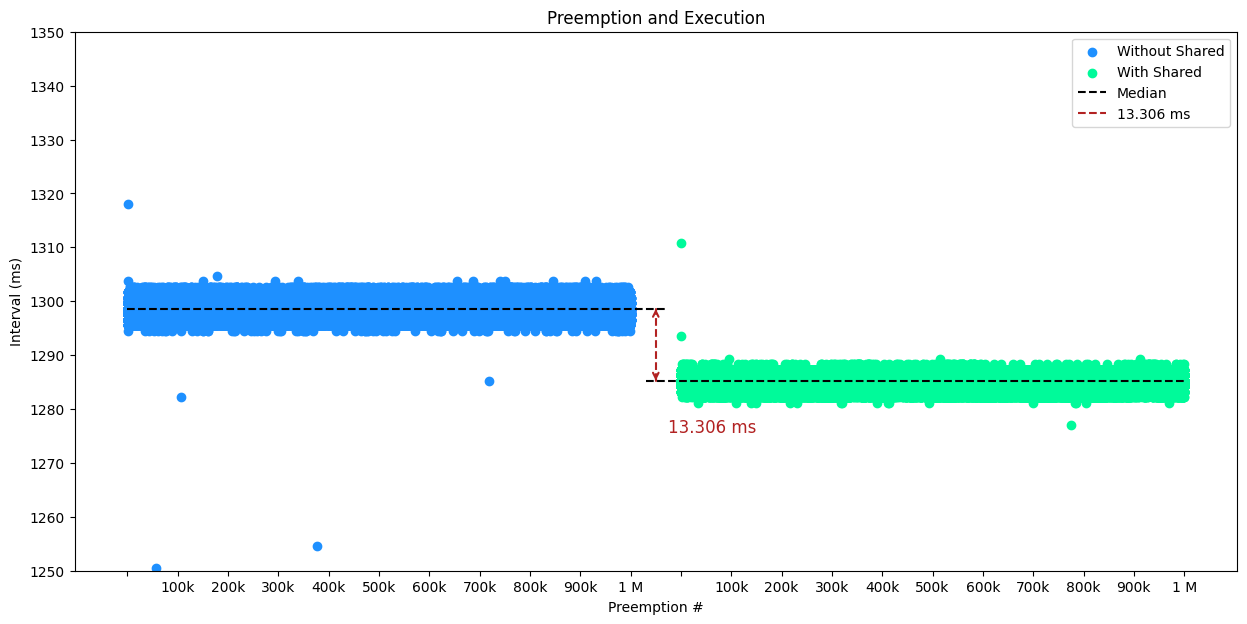

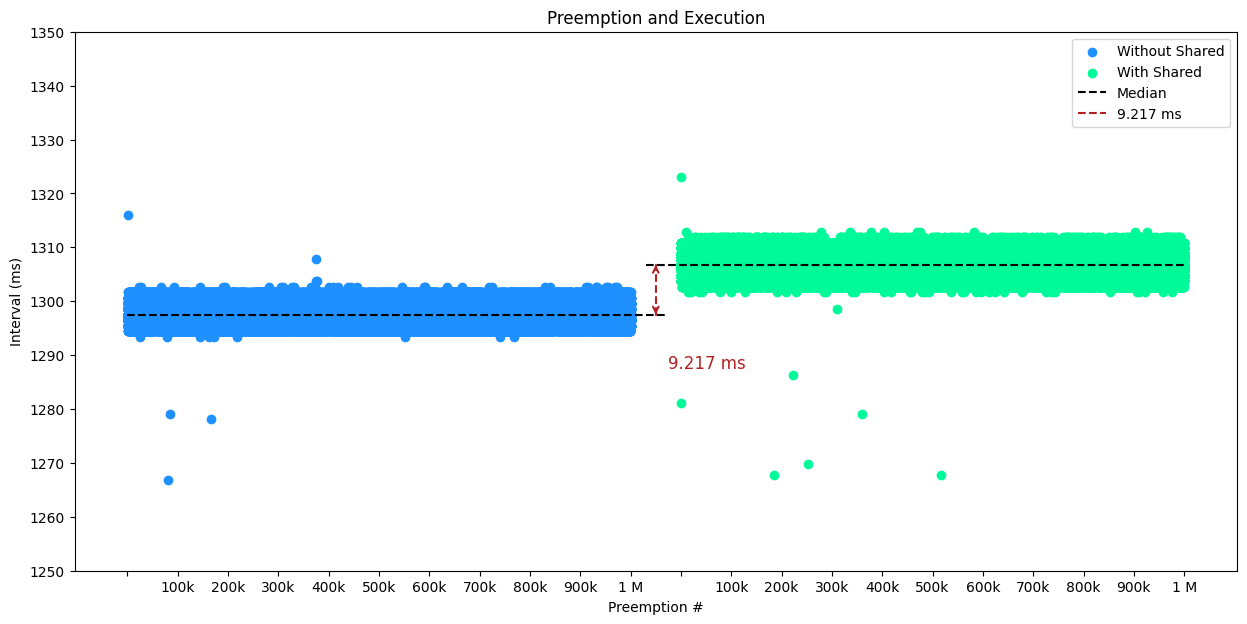

In [3]:
NUM_SAMPLES = 1000000
offset = NUM_SAMPLES // 10
for no_shared_ivls, shared_ivls in zip(no_shared_ivls_array, shared_ivls_array):
  plot_side_by_side(noSharedData=no_shared_ivls, sharedData=shared_ivls, NUM_SAMPLES=NUM_SAMPLES, lowerBound=1.25e3, upperBound=1.35e3, medianLines=True, offset=offset)

## Plot the typical worst-case lines

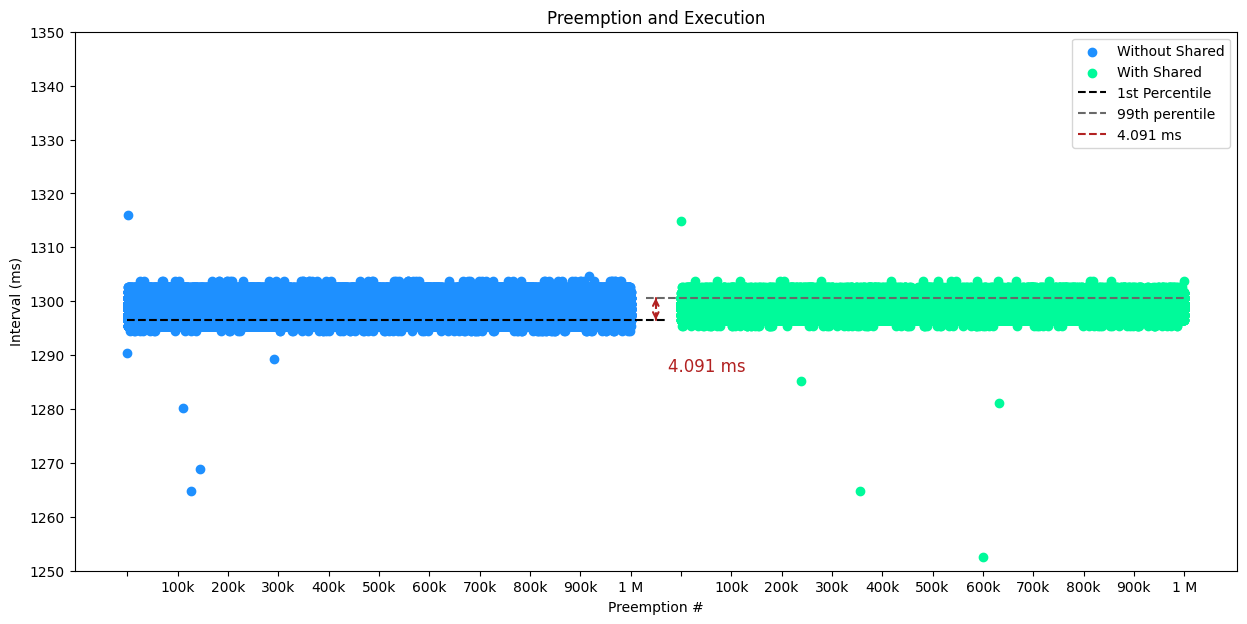

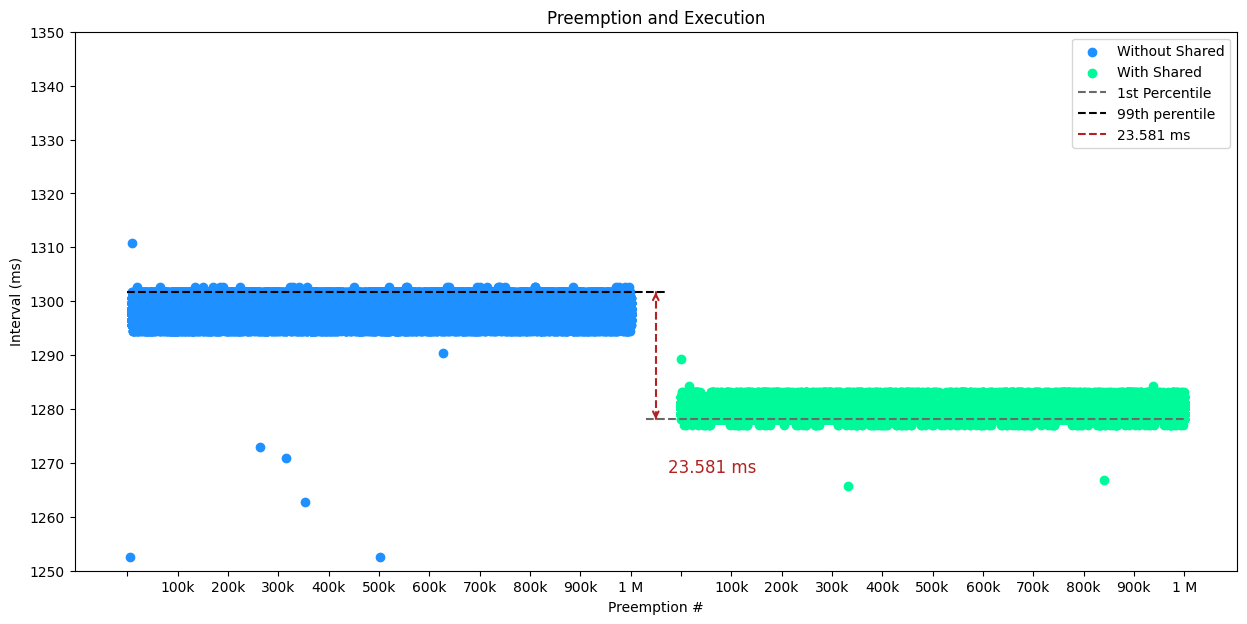

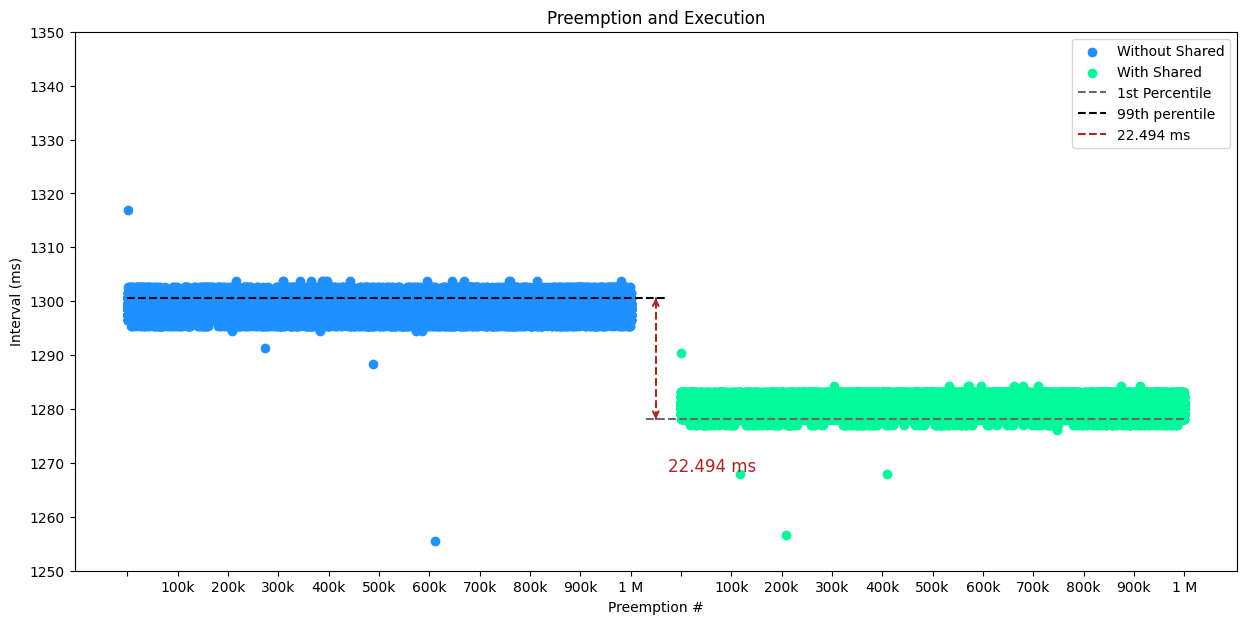

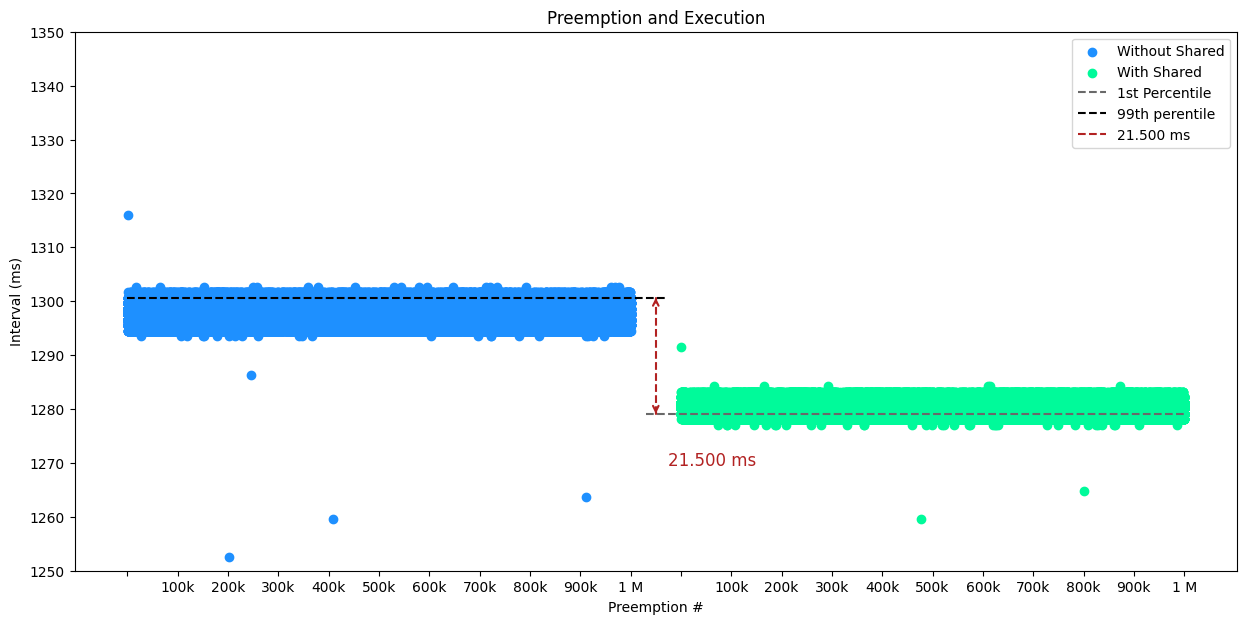

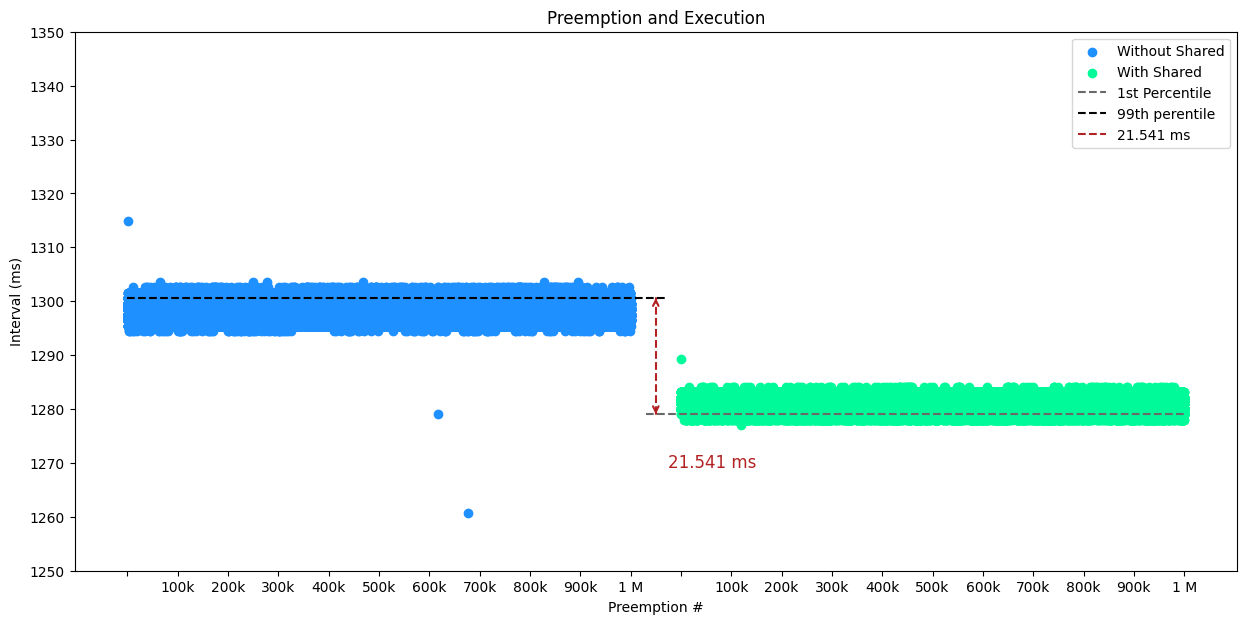

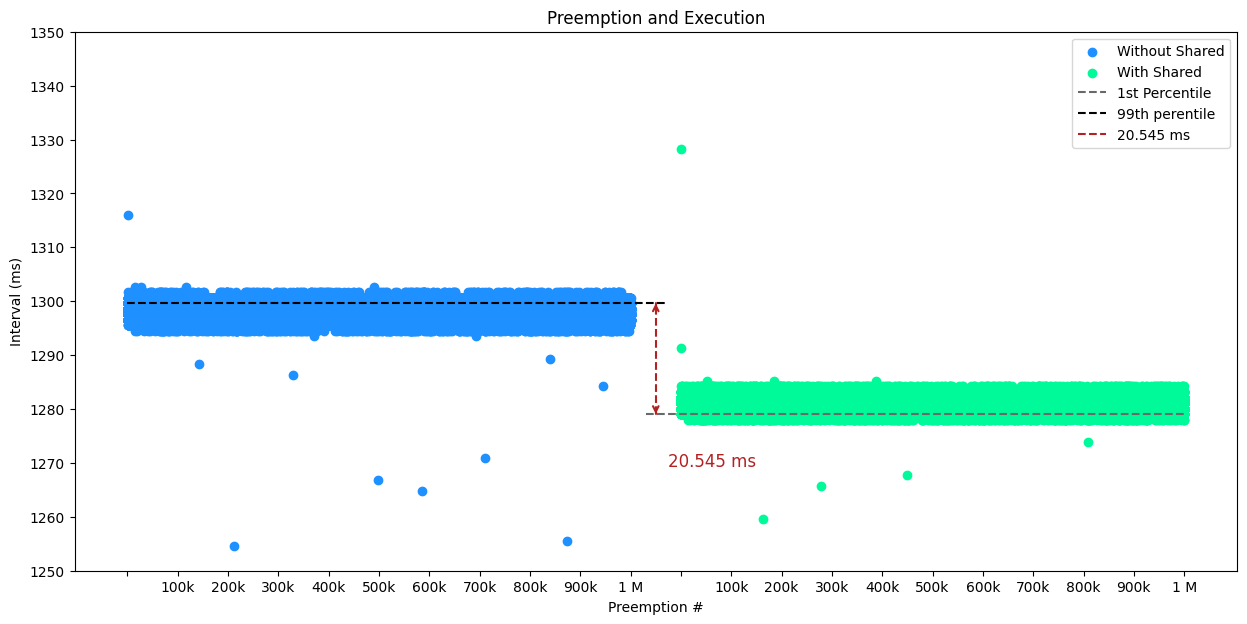

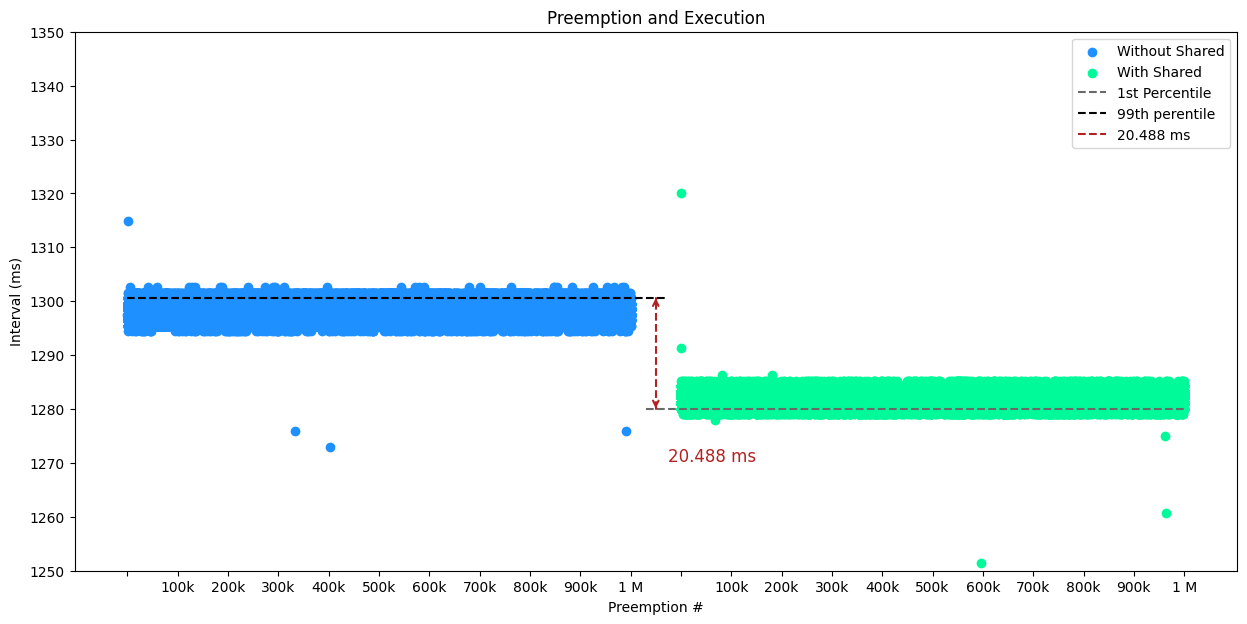

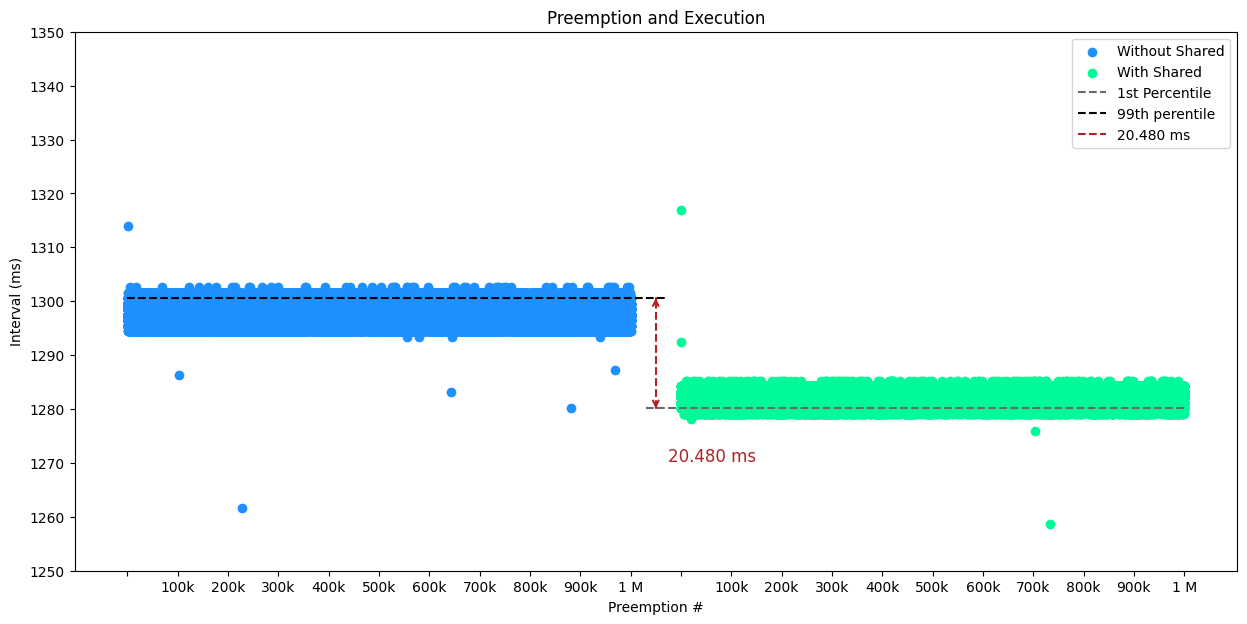

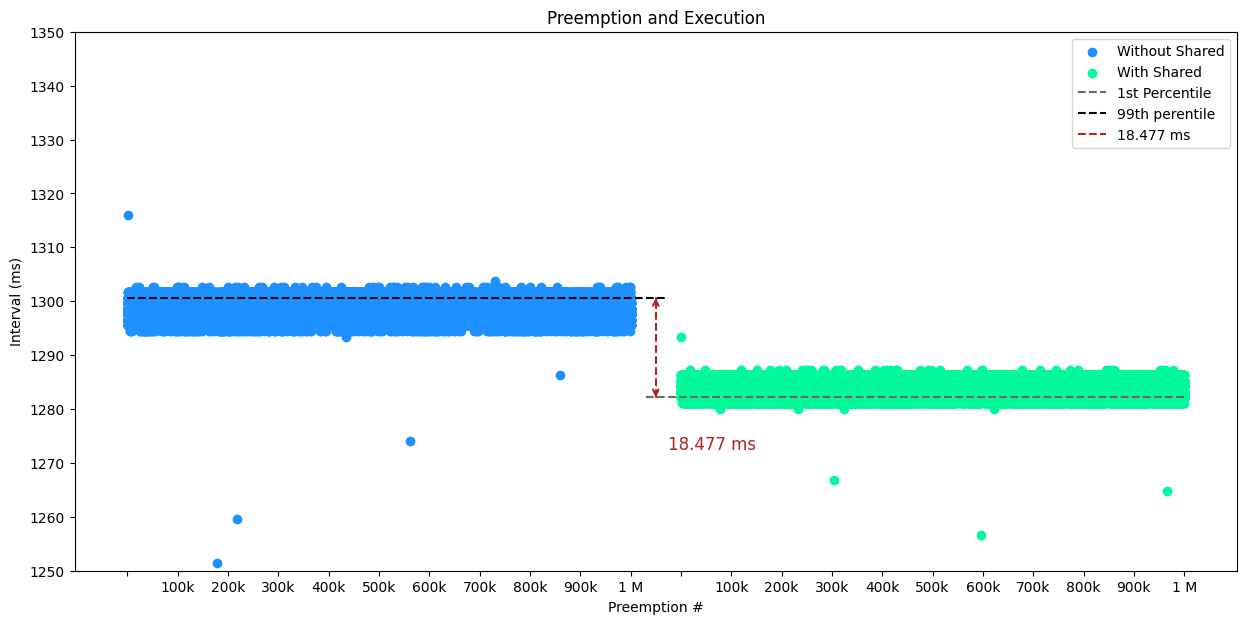

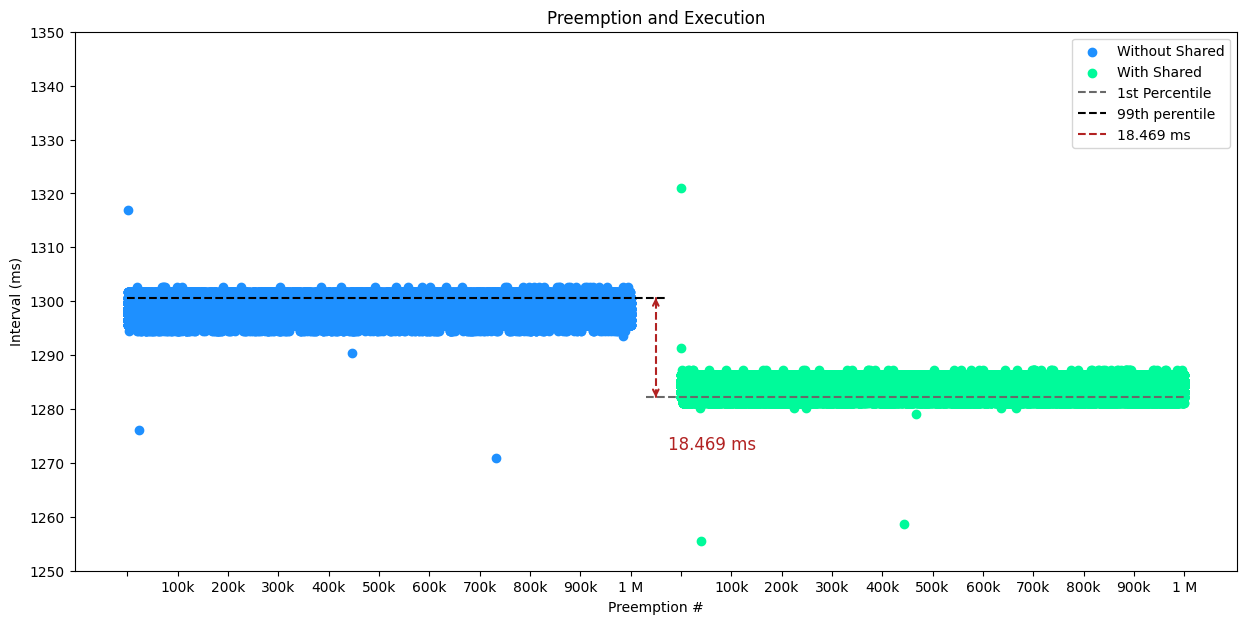

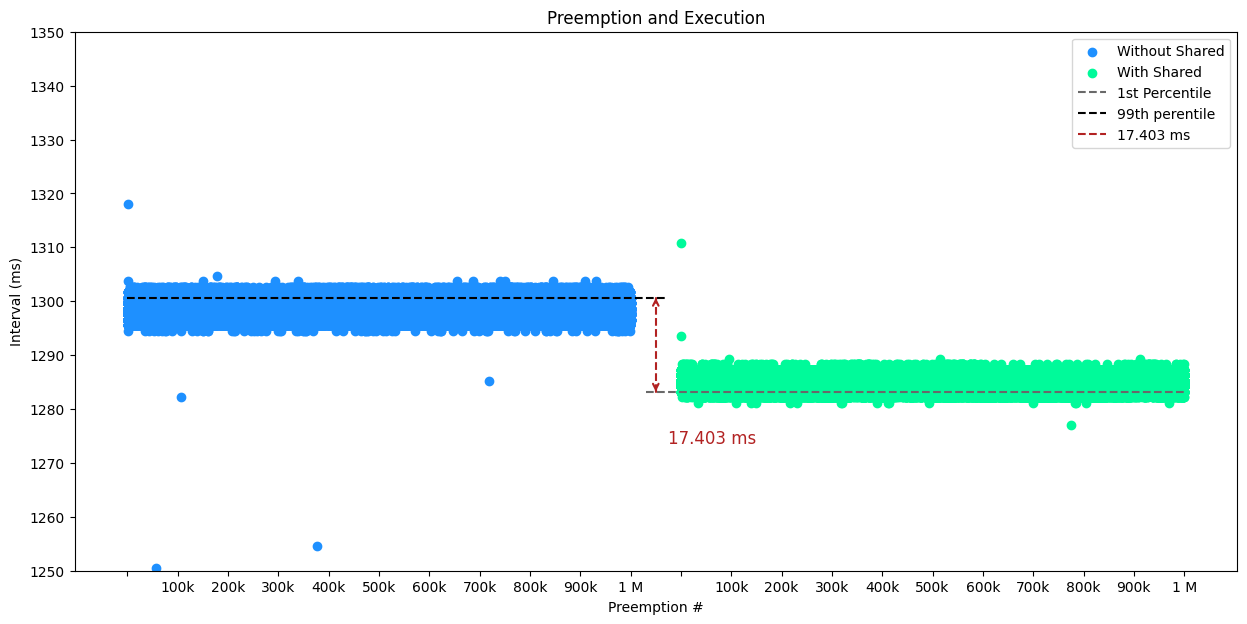

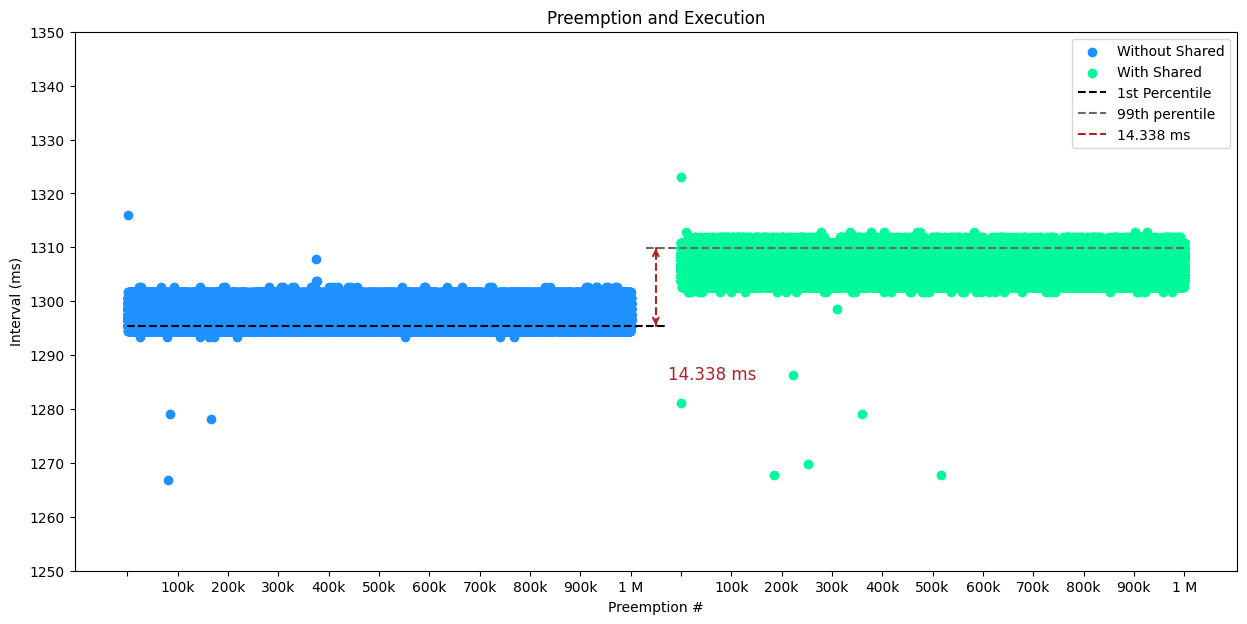

In [4]:
for no_shared_ivls, shared_ivls in zip(no_shared_ivls_array, shared_ivls_array):
  plot_side_by_side(noSharedData=no_shared_ivls, sharedData=shared_ivls, NUM_SAMPLES=NUM_SAMPLES, lowerBound=1.25e3, upperBound=1.35e3, worstCaseLines=True, offset=offset)

## Plot the block lines for each data block

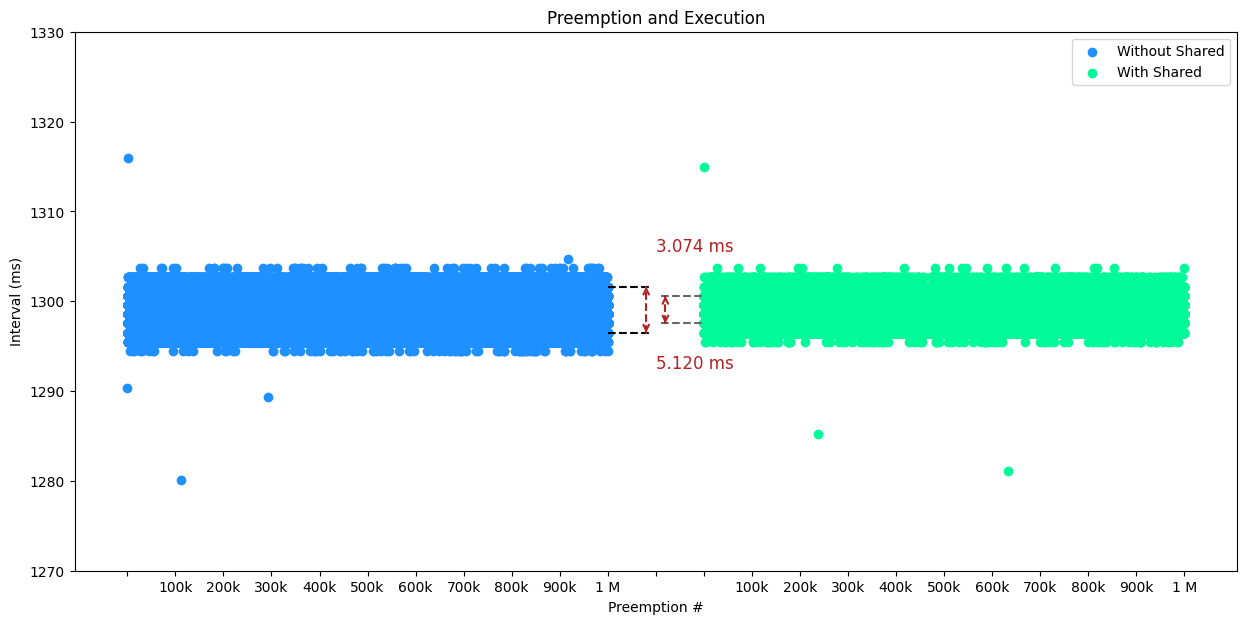

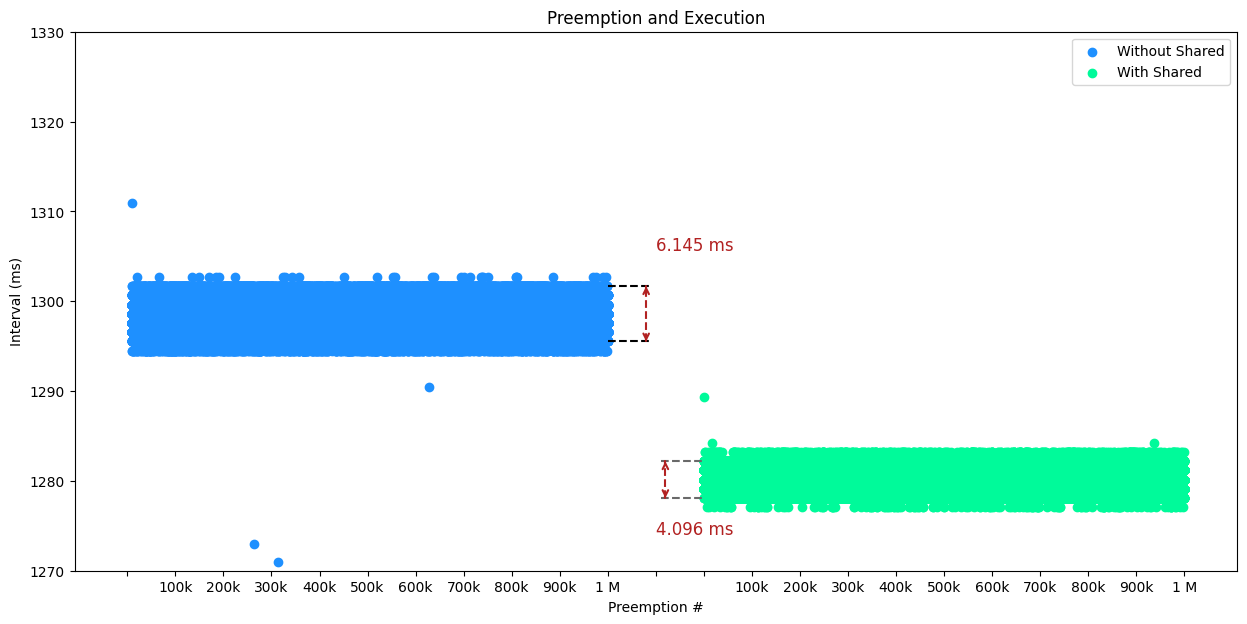

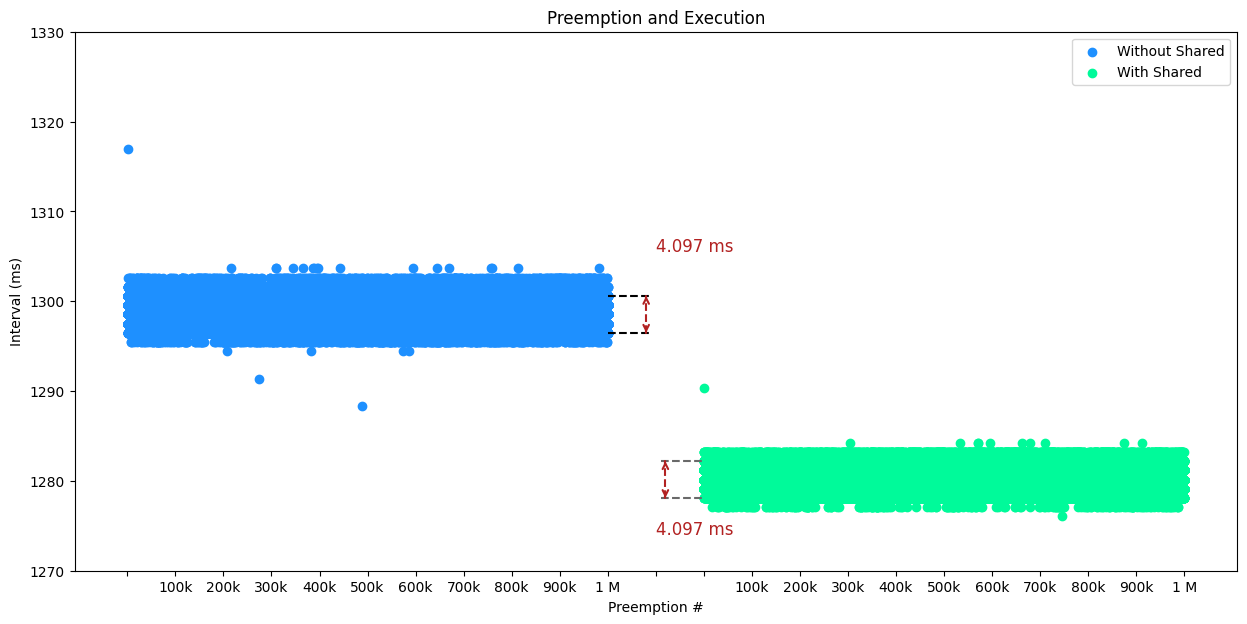

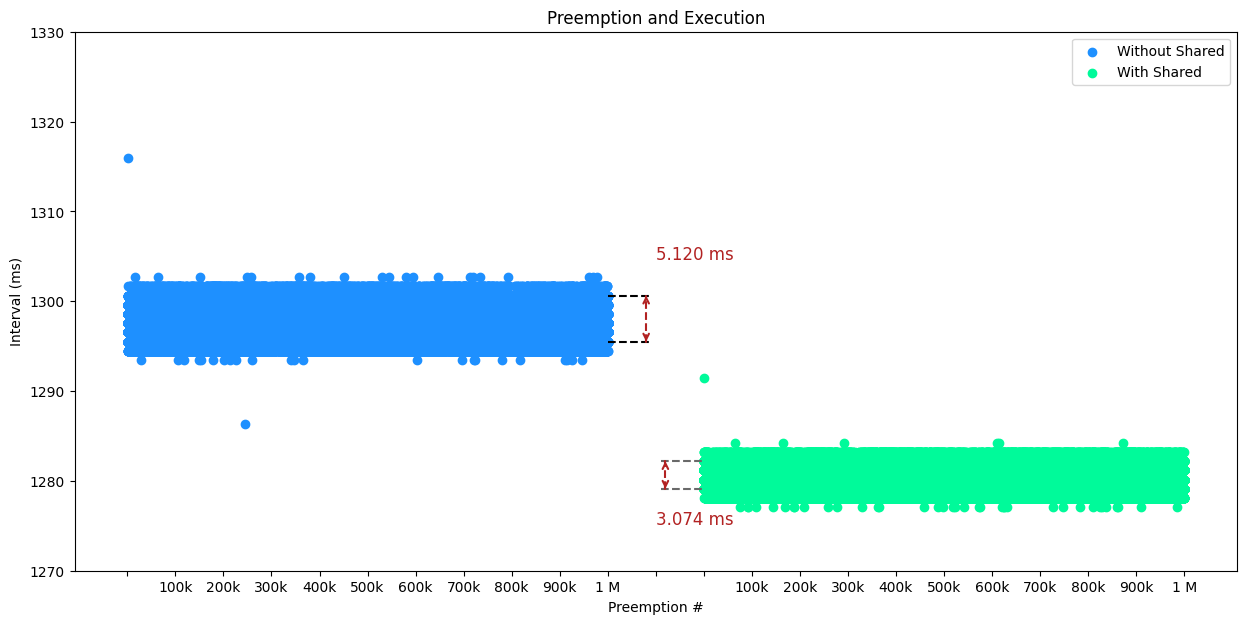

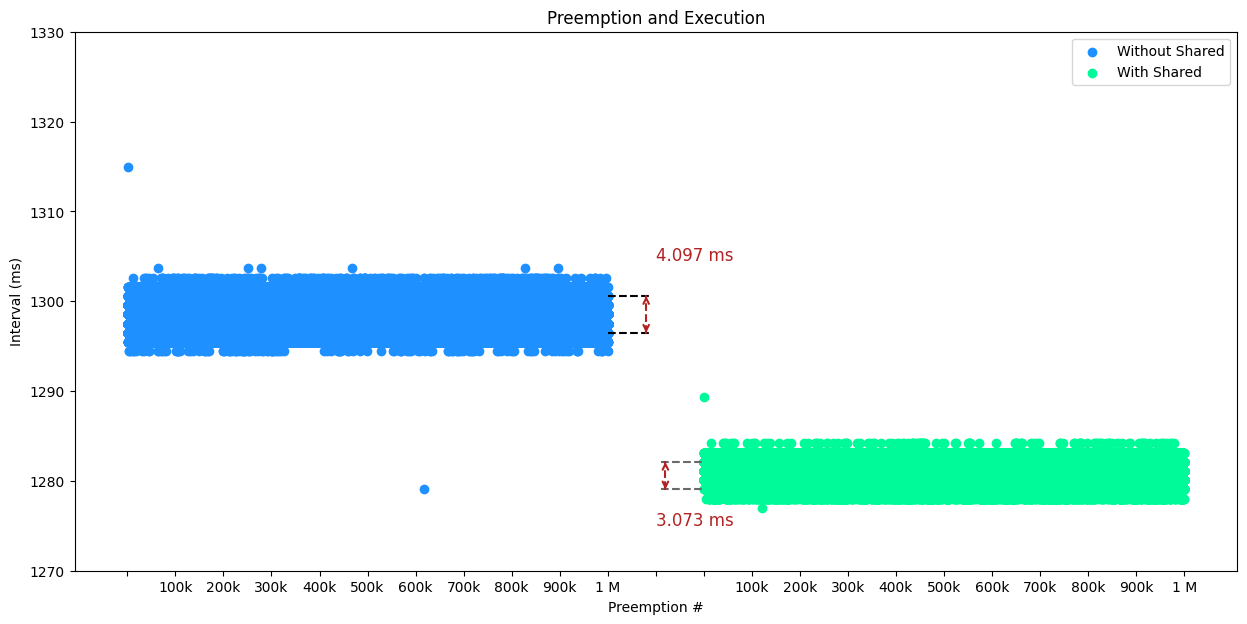

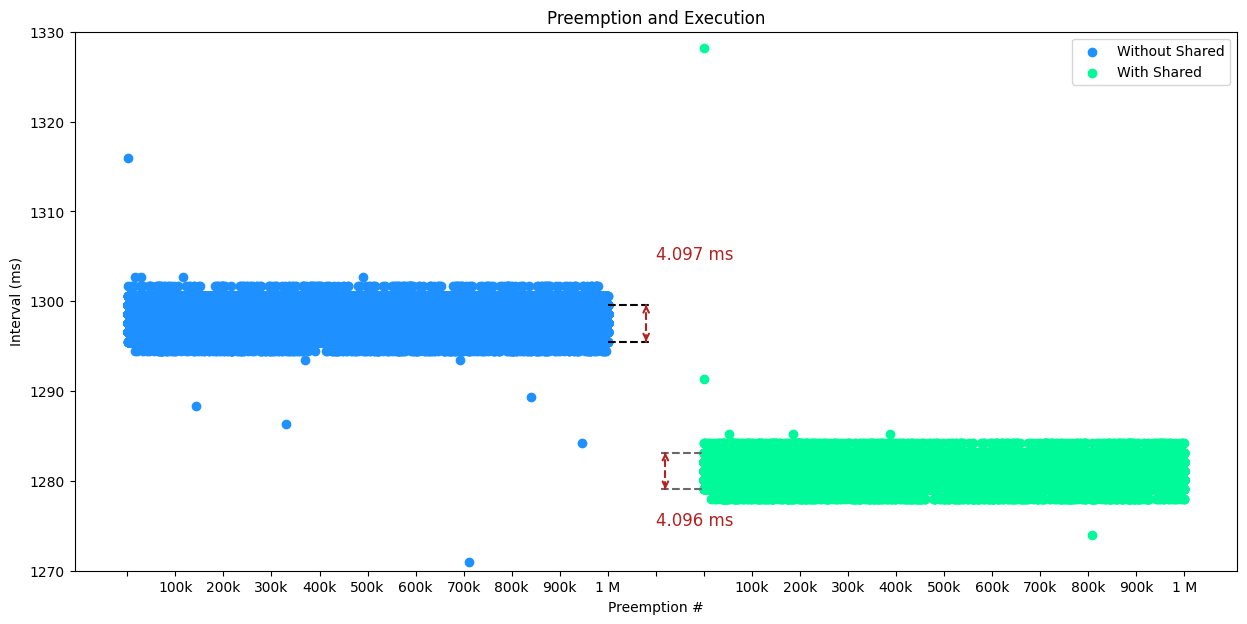

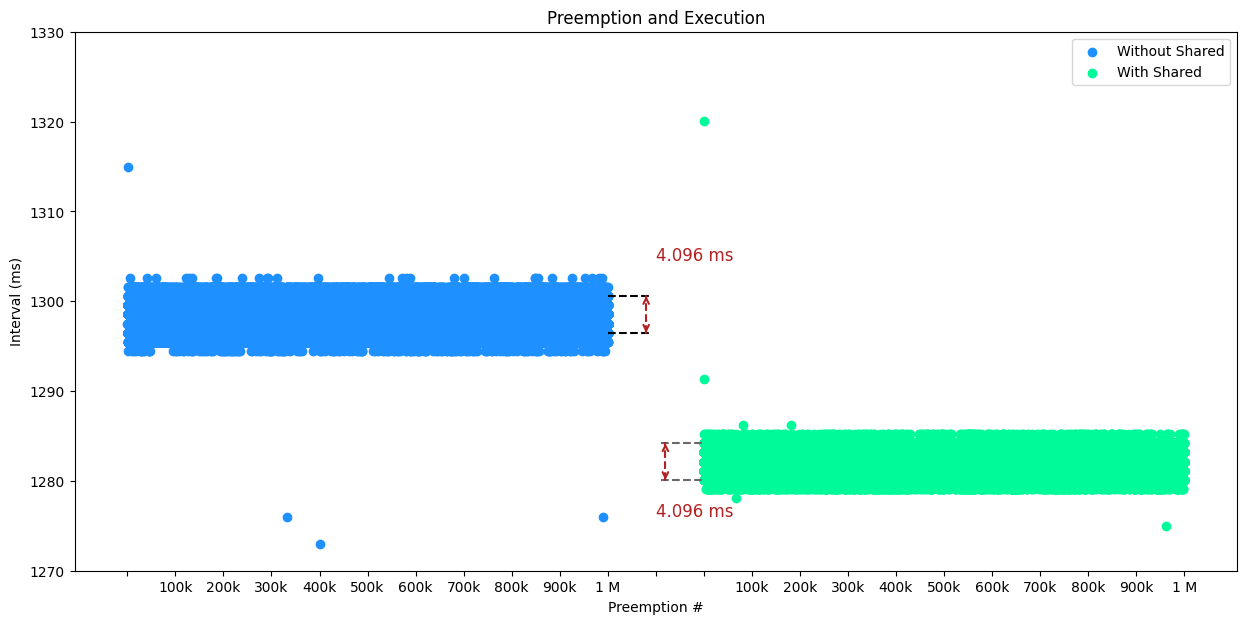

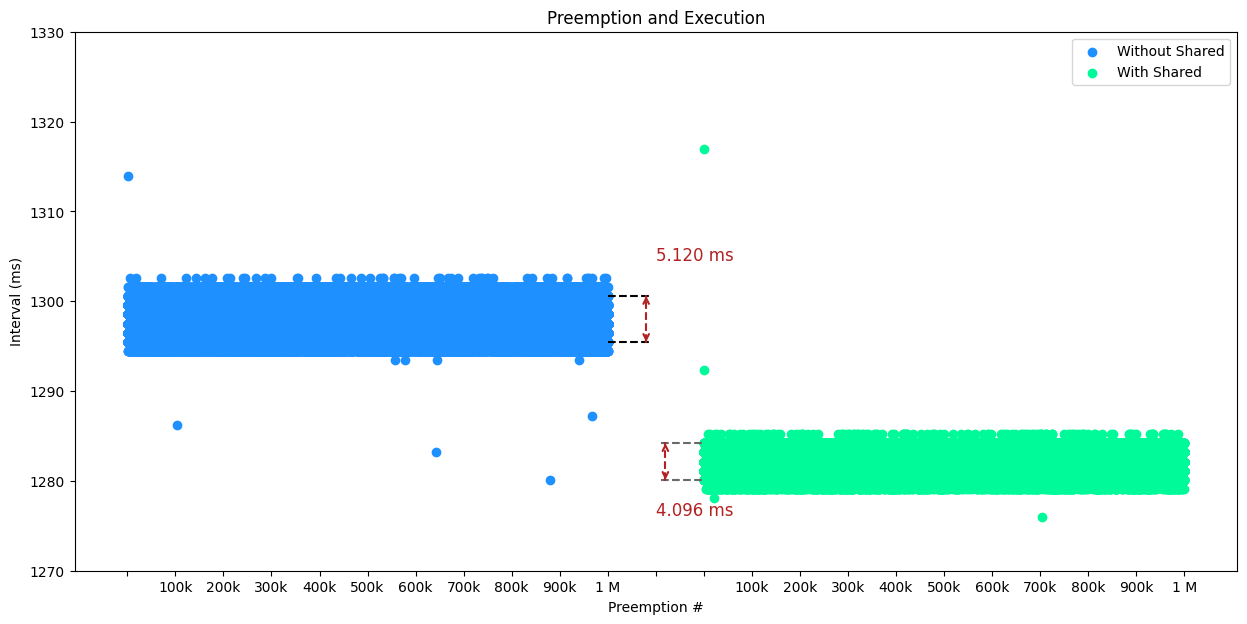

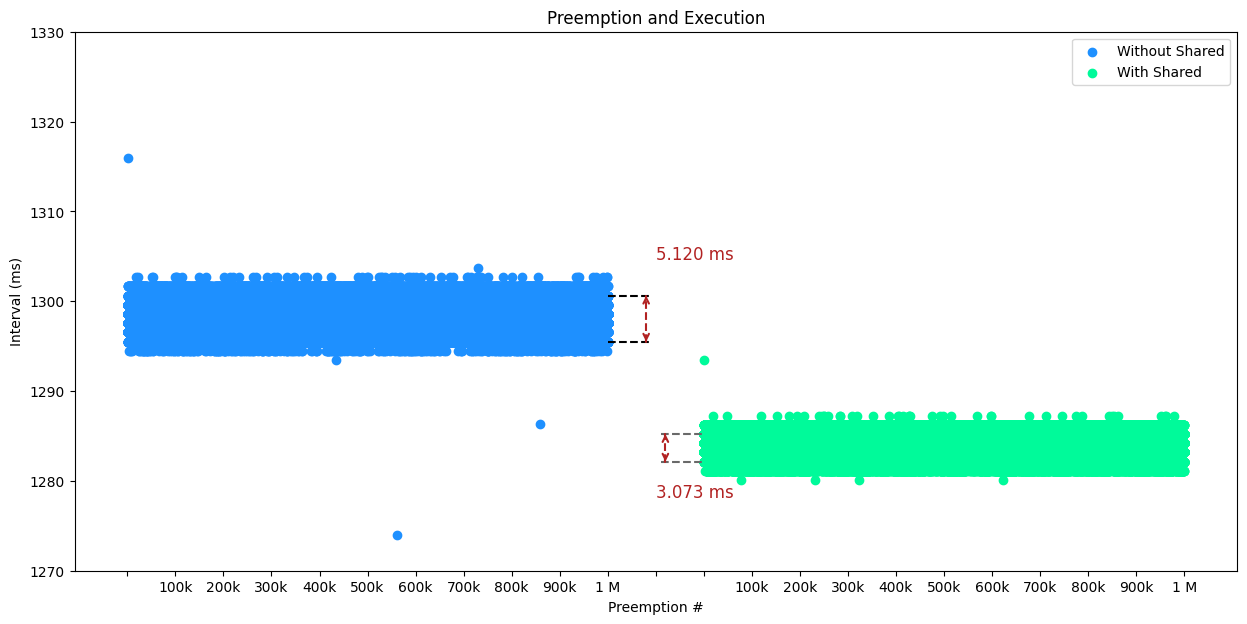

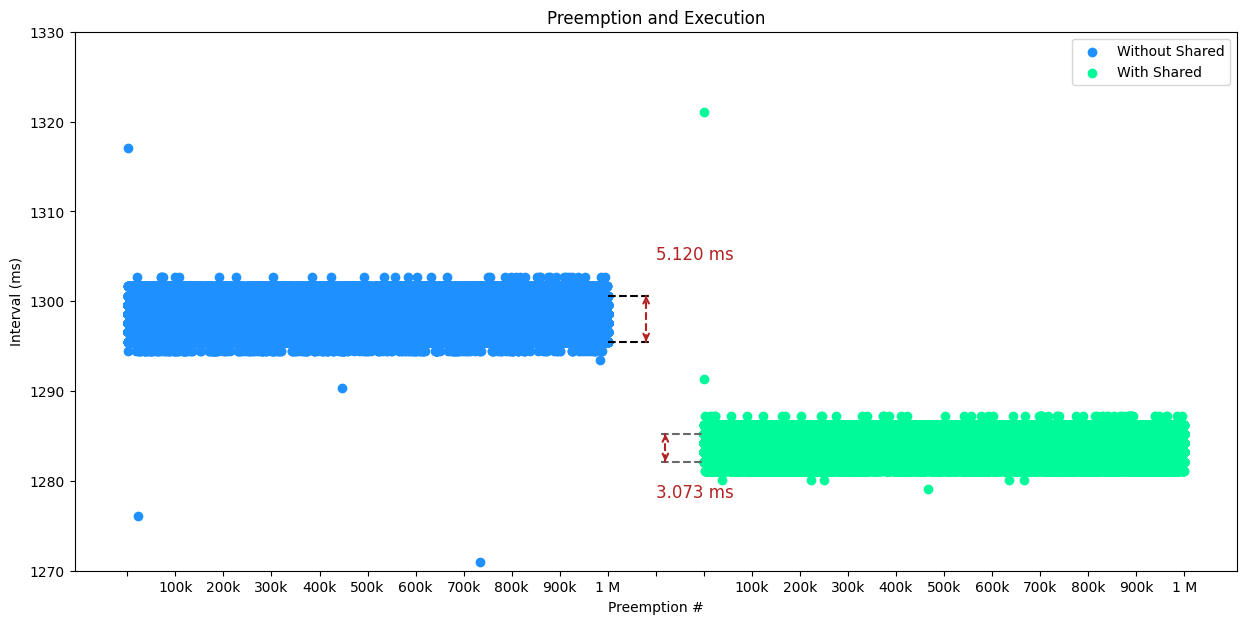

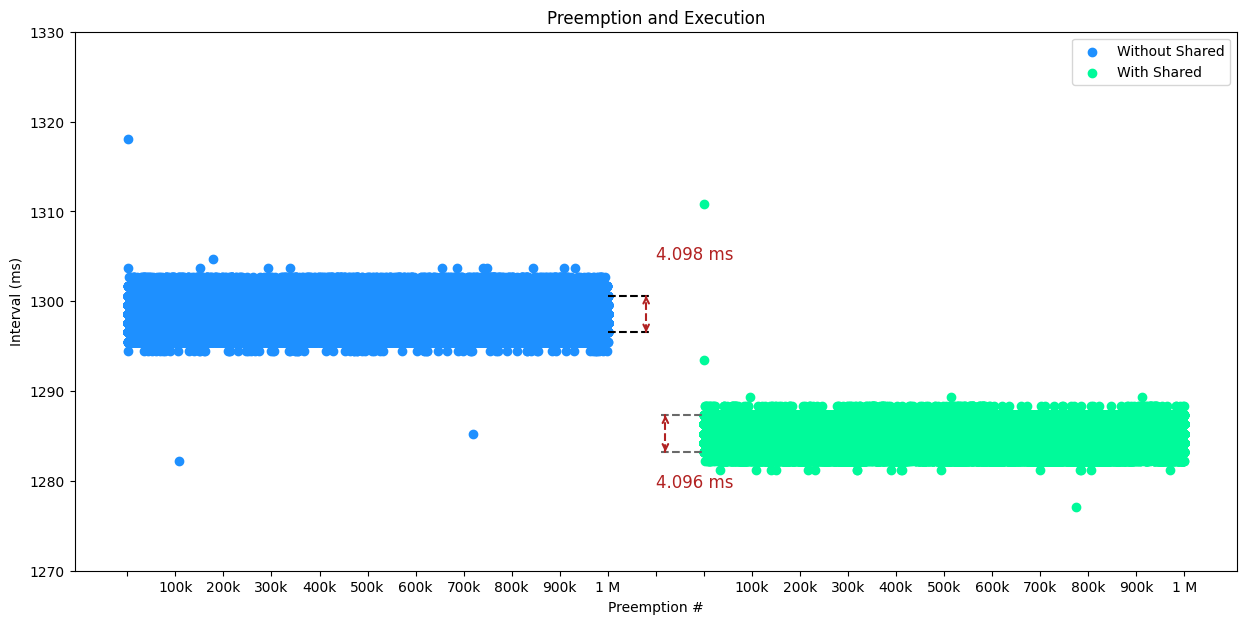

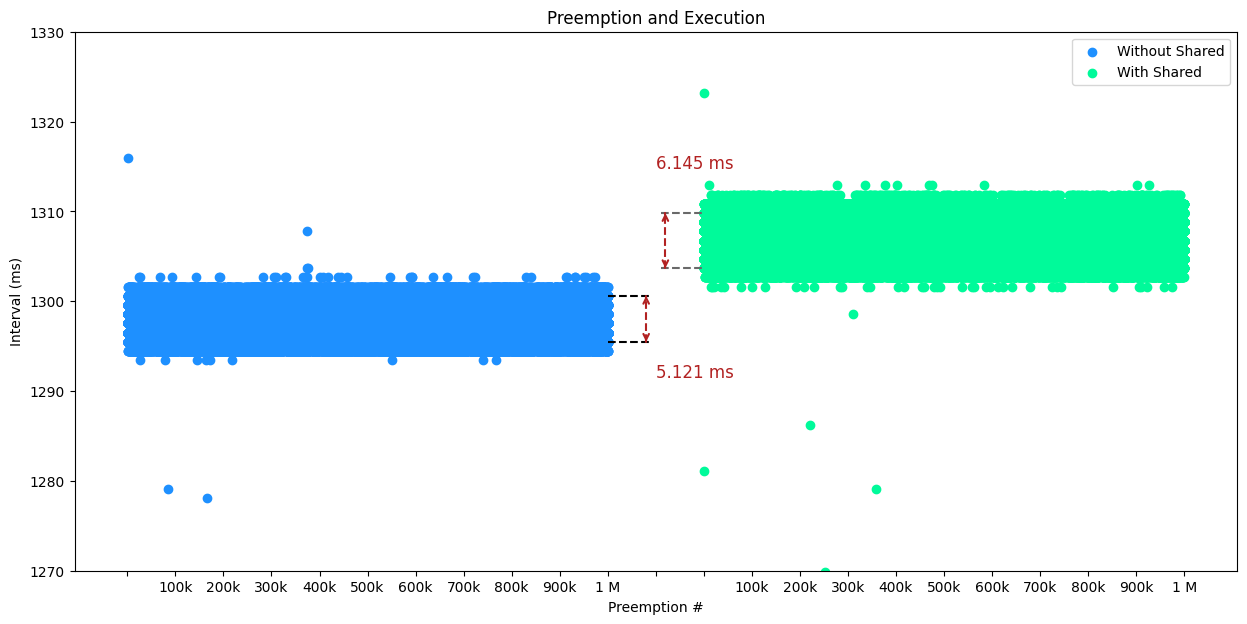

In [5]:
for no_shared_ivls, shared_ivls in zip(no_shared_ivls_array, shared_ivls_array):
  plot_side_by_side(noSharedData=no_shared_ivls, sharedData=shared_ivls, NUM_SAMPLES=NUM_SAMPLES, lowerBound=1270, upperBound=1330, blockLines=True, offset=2*offset)